In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

c:\users\chaitrali\pycharmprojects\clustering\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\chaitrali\pycharmprojects\clustering\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\chaitrali\pycharmprojects\clustering\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\chaitrali\pycharmpr

In [2]:
def ScatterPlot(X, Y, assignments=None, centers=None):
  if assignments is None:
    assignments = [0] * len(X)
  fig = plt.figure(figsize=(14,8))
  cmap = ListedColormap(['red', 'green', 'blue', 'magenta'])
  plt.scatter(X, Y, c=assignments, cmap=cmap)
  if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), 
                marker='+', s=400, cmap=cmap)  
  plt.xlabel('Product_Visibility')
  plt.ylabel('Product_Sales')
  plt.show()

In [3]:
hw_frame = pd.read_csv(
  'C:/MS_SEM3/Udemy/Clustering/TensorFlow_examples/TF_data.txt', delim_whitespace=True,
  header=None, names=['Product_Visibility', 'Product_Sales'])

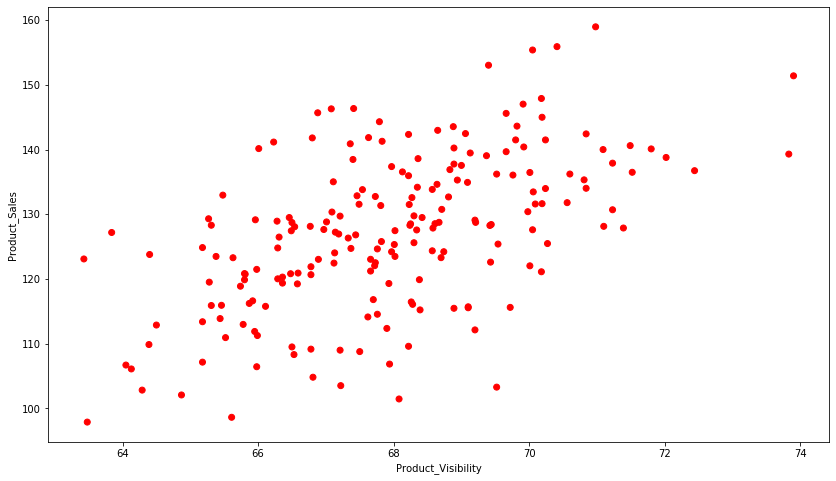

In [4]:
ScatterPlot(hw_frame.Product_Visibility, hw_frame.Product_Sales)

In [5]:
def input_fn():
  return tf.constant(hw_frame.values, tf.float32, hw_frame.shape), None

In [6]:
tf.logging.set_verbosity(tf.logging.ERROR)
kmeans = tf.contrib.learn.KMeansClustering(num_clusters=4, relative_tolerance=0.0001)
_ = kmeans.fit(input_fn=input_fn)

In [7]:
clusters = kmeans.clusters()
assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))

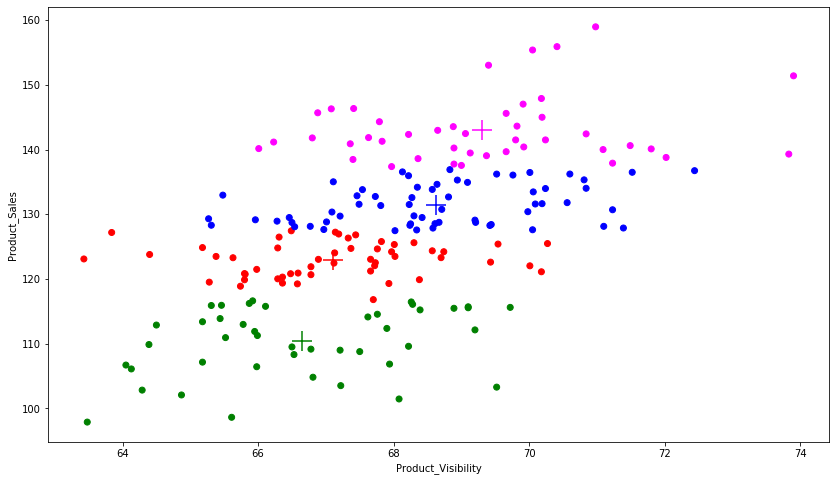

In [8]:
ScatterPlot(hw_frame.Product_Visibility, hw_frame.Product_Sales, assignments, clusters)